In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

## Only Modules like Metrics and Data preprocessor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

from datetime import datetime, timedelta
%matplotlib inline

**Gathering Data, Performing small EDA conclusion and Feature Enginnering** <br>
The data we are using is STEM salaries, You can Download from here : https://github.com/niranjandasMM/Scratch_Multivariate_Polynomial_Regression/blob/main/Levels_Fyi_Salary_Data.csv

In [10]:
def stem_data():
    ## Read the dataset
    data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
    data = data[['yearsatcompany', 'yearsofexperience', 'totalyearlycompensation', 'basesalary']]
    
    features = data[['yearsatcompany', 'yearsofexperience', 'basesalary']]
    target = data[['totalyearlycompensation']]

     ### EDA starts ########
    print('Shows Realtionship between Features and Varibles themselves')
    data = pd.DataFrame(np.hstack((features, target)), columns=['yearsatcompany', 'yearsofexperience', 'basesalary', 'totalyearlycompensation'])

    # Plot the scatter plot matrix using Seaborn
    sns.pairplot(data)

    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    #### EDA ends #########

    # Perform min-max scaling
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    return x_train, x_test, y_train, y_test

**Building the Model** <br>
Features we selected in this intial notebook are : ['yearsatcompany', 'yearsofexperience', 'basesalary']. Try to change it and observe the Relationships.

In [11]:
class PolynomialRegression:
    def __init__(self, degrees):
        self.degrees = degrees
        self.w = 0
        self.b = 0

    def gradients(self, X, X_transformed,  y_train, y_pred, lr):
        m = X.shape[0]  ## no. of samples, no. of features
        error = y_pred - y_train
        
        dw = (1/m) * np.dot(X_transformed.T, error)
        db = (1/m) * np.sum(error)

        self.w -= lr * dw
        self.b -= lr * db

    def predict(self, X, test=False):
        if test:
            X_transformed = self.x_transform(X)
            return np.dot(X_transformed, self.w) + self.b
        else:
            return np.dot(X, self.w) + self.b

    def train(self, X_train, y_train, epochs, lr):

        X_transformed = self.x_transform(X_train)
        m, n = X_transformed.shape  ## no. of samples, no. of features

        self.w = np.zeros((n, 1))  
        self.b = 0
        losses = []
        
        for epoch in range(epochs):
            # y_pred = w1*x1 + w2*x1^2 + w3*x2 + w4*x2^2 + w5*x3 + w6*x3^2 + b ## degree = 2
            y_pred = self.predict(X_transformed)
            self.gradients(X_train, X_transformed, y_train, y_pred, lr)
            # print(f"self.w and self.b are : {self.w, self.b}")

            loss = mean_squared_error(y_train, y_pred) 
            
            if epoch % 10 == 0:
                # Initialize an empty list to store the data for the maximum difference
                data = []

                # Iterate over the predictions and actual values
                for x, y in zip(y_pred, y_train):
                    diff = abs(x - y)  # Calculate the absolute difference
                    data.append({"y_predicted": x, "actual": y, "difference": diff})

                # Create the DataFrame outside the loop
                df = pd.DataFrame(data)
                # print(df)
                max_diff = df['difference'].max()
                
                sys.stdout.write(
                    "\n" +
                    "I:" + str(epoch) +
                    " Train-Err:" + str(loss / float(len(X_train)))[0:5] +
                    " MAX Difference: " + str(max_diff) +
                    "\n"
                )
        print(f" training r2 score is : {r2_score(y_train, y_pred)}")
        return y_pred
    
    def x_transform(self, X):
        t = X.copy()
        for i in self.degrees:
            X_transformed = np.append(X, t**i, axis=1)
        return X_transformed

**The main script to call the function**

Shows Realtionship between Features and Varibles themselves


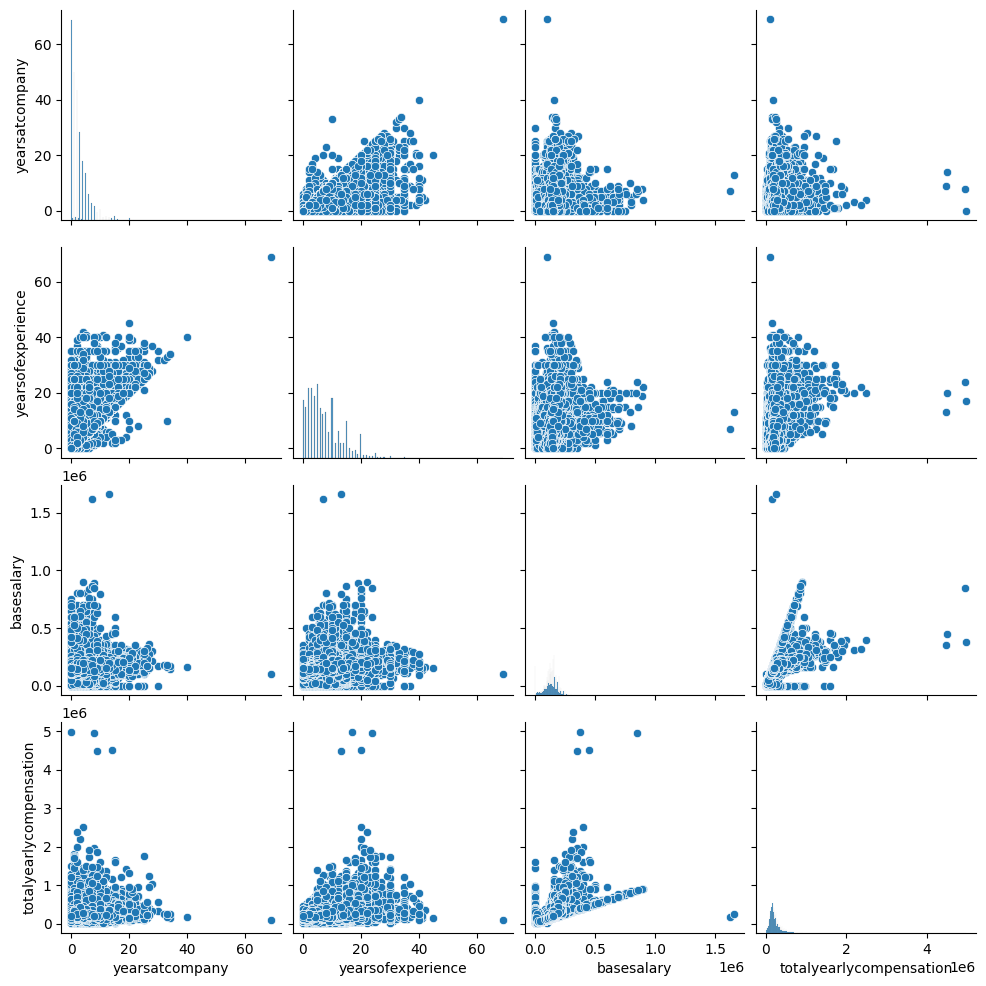

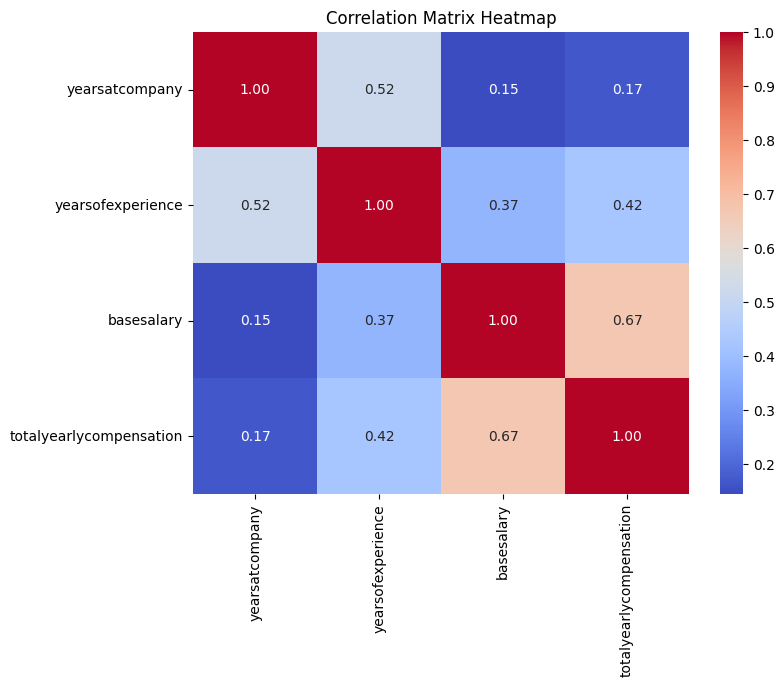


I:0 Train-Err:15040 MAX Difference: [4980000.]

I:10 Train-Err:41504 MAX Difference: [4746770.28565155]

I:20 Train-Err:40253 MAX Difference: [4736860.47425003]

I:30 Train-Err:39150 MAX Difference: [4727481.3966719]

I:40 Train-Err:38173 MAX Difference: [4718595.56131585]

I:50 Train-Err:37305 MAX Difference: [4710168.28467817]

I:60 Train-Err:36530 MAX Difference: [4702167.47884248]

I:70 Train-Err:35837 MAX Difference: [4694563.45508318]

I:80 Train-Err:35214 MAX Difference: [4687328.74235776]

I:90 Train-Err:34651 MAX Difference: [4680437.91955904]
 training r2 score is : 0.2188677493129162
testing r2 score  is : 0.22054585511274982


In [12]:
X_train, X_test, y_train, y_test = stem_data()

## Raw Non-linear Data
# np.random.seed(42)
# X = np.random.rand(1000, 3)
# y = 5 * (X[:, 0] ** 2 + X[:, 1] ** 2 + X[:, 2] ** 2) + np.random.rand(1000)
# y = y.reshape(-1, 1)

degree = [2]

model = PolynomialRegression(degrees=degree)
y_train_pred = model.train(X_train, y_train, epochs=100, lr=0.9)

y_test_pred = model.predict(X_test, test=True)

print(f"testing r2 score  is : {r2_score(y_test, y_test_pred)}")

## Still working in make the plot better
# fig, ax = plt.subplots(figsize=(18, 10))
# # ax.plot(X_train, y_train_pred, label='Predicted (Train)', color='green')
# # ax.plot(X_train, y_train, label='Actual (Train)', color='darkblue')
# ax.plot(X_test, y_test_pred, label='Predicted (Test)', color='green')
# ax.plot(X_test, y_test, label='Actual (Test)', color='red')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_title('Predicted vs Actual Stock Prices')
# ax.legend()
# plt.show()